In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
print("Packages")

stock = 'SPY'
data = yf.Ticker(stock)

df = data.history(period="10y", interval="1mo")

Packages


In [27]:
df = df.drop(columns=['Dividends', 'Stock Splits', 'Capital Gains'])
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-02-01 00:00:00-05:00,168.072841,178.314323,166.232902,176.986877,1901638100
2015-03-01 00:00:00-05:00,177.087690,178.163086,171.492260,173.433014,2749923000
2015-04-01 00:00:00-04:00,174.173445,179.312821,172.586901,175.920334,2036685200
2015-05-01 00:00:00-04:00,176.713593,180.409899,174.485686,178.181992,1892519900
2015-06-01 00:00:00-04:00,178.857102,180.038563,173.236696,173.717728,2535242600


Text(0.5, 1.0, 'SPY Price')

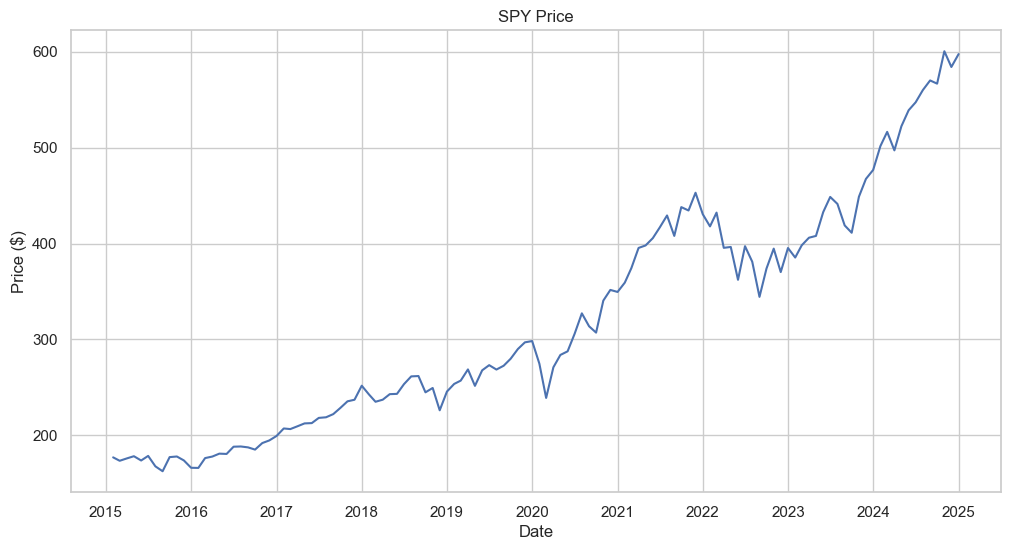

In [82]:
# Plot SPY historical price
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'])
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('SPY Price')

Text(0.5, 1.0, 'SPY Monthly Returns')

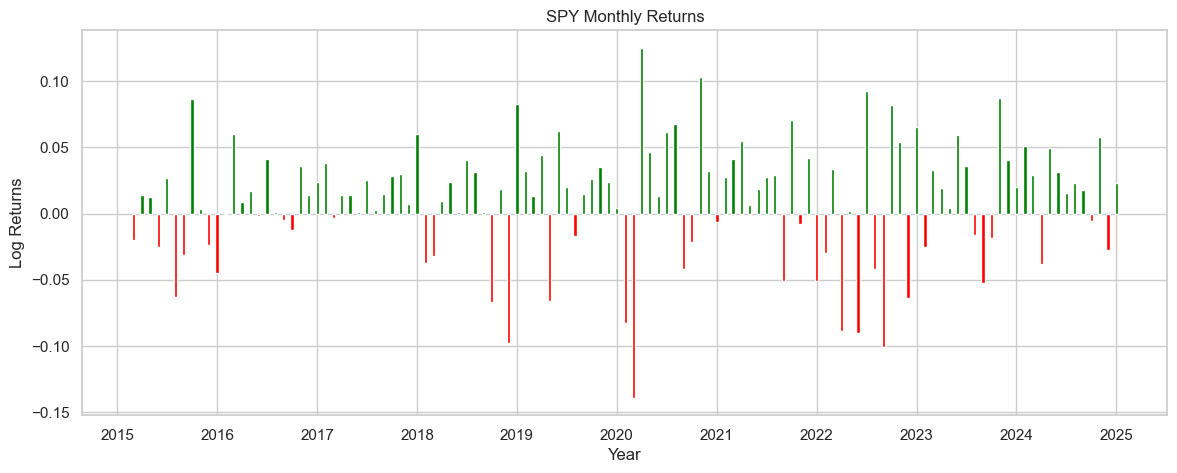

In [80]:
# Calculate log returns
sns.set(style='whitegrid')
df['log_returns'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
plt.figure(figsize=(14,5))
plt.bar(df.index, df['log_returns'], color=['green' if r > 0 else 'red' for r in df['log_returns']], width=12)
plt.xlabel('Year')
plt.ylabel('Log Returns')
plt.title('SPY Monthly Returns')

In [68]:
# Add rolling volatility column
window_size = 12
df['volatility'] = df['log_returns'].rolling(window_size).std()

Text(0.5, 1.0, '12-month Rolling Volatility')

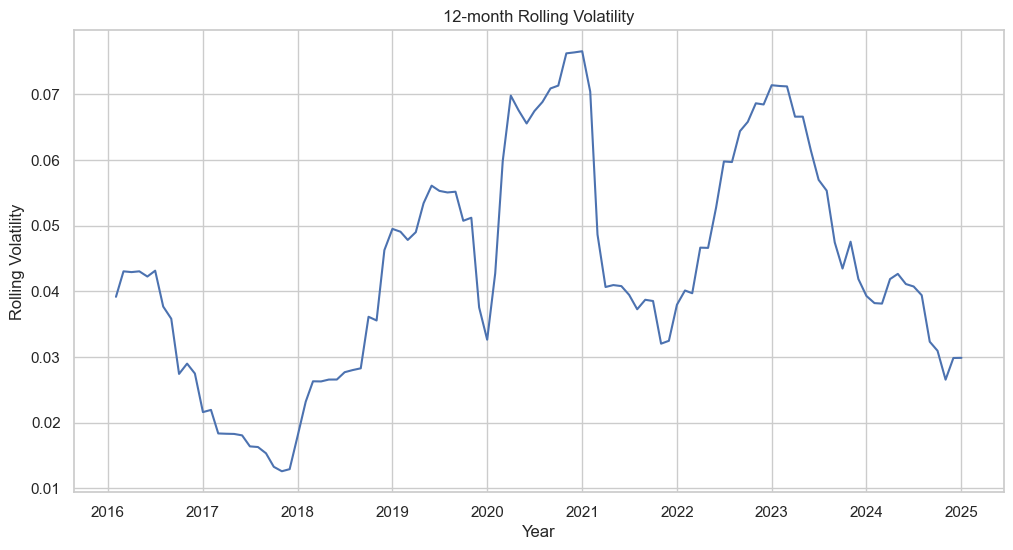

In [79]:
# Plot rolling volatility
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
plt.plot(df.index, df['volatility'])
plt.xlabel('Year')
plt.ylabel('Rolling Volatility')
plt.title(f'{window_size}-month Rolling Volatility')

In [70]:
# Add a range column
df['range'] = df['High'] - df['Low']

Text(0.5, 1.0, 'Monthly Range (High - Low)')

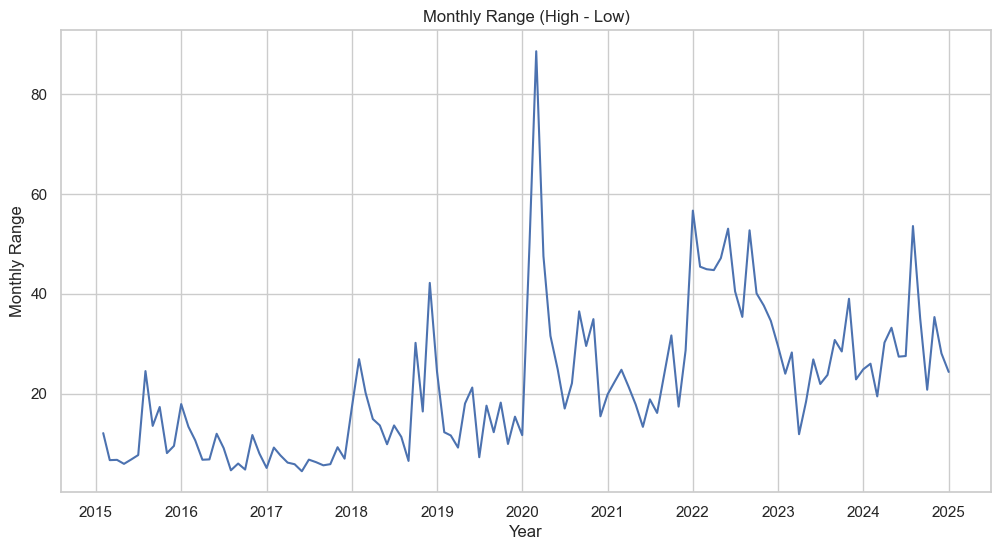

In [78]:
# Plot monthly range
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
plt.plot(df.index, df['range'])
plt.xlabel('Year')
plt.ylabel('Monthly Range')
plt.title('Monthly Range (High - Low)')

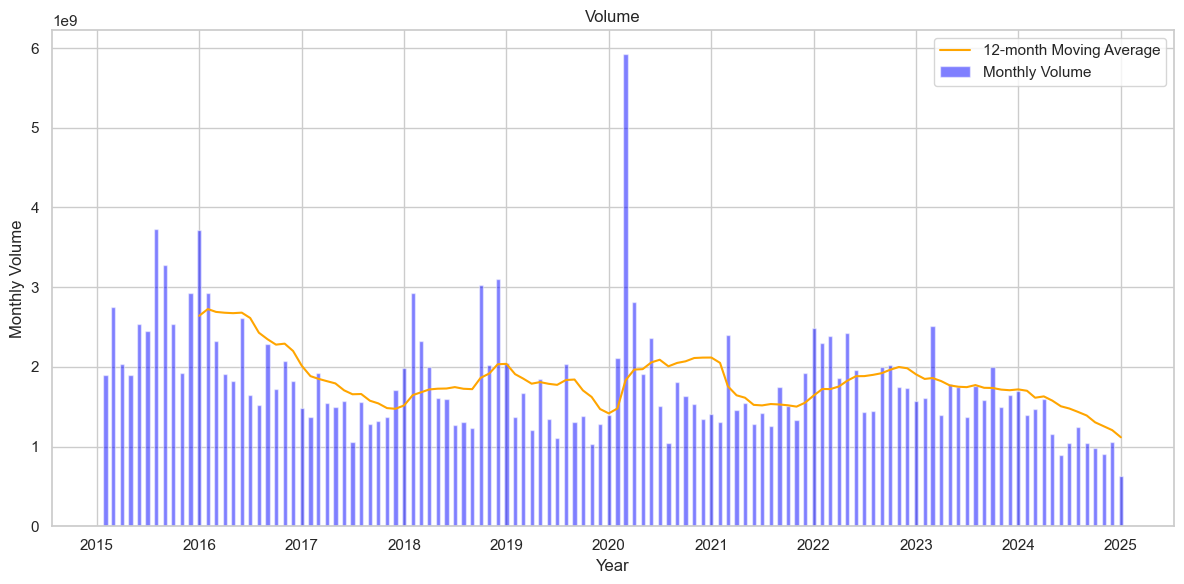

In [77]:
# Create a moving average for volume
ma_window = 12
df['volume_ma'] = df['Volume'].rolling(window=ma_window).mean()

# Plot monthly volume
sns.set(style='whitegrid')

plt.figure(figsize=(12,6))
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5, width=15, label='Monthly Volume')
plt.plot(df.index, df['volume_ma'], color='orange', label=f'{ma_window}-month Moving Average')
plt.xlabel('Year')
plt.ylabel('Monthly Volume')
plt.title('Volume')

plt.legend()
plt.tight_layout()